In [555]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Data Exploration

In [556]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [557]:
# Drop useless columns

train.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [558]:
train.info()

# Age has missing values. Will deal with this later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [559]:
# See whether any categories in categorical variables need combining

train_numeric_cols = ["Age", "Fare"]
train_categorical_cols = ["Pclass", "Sex", "Embarked", "SibSp", "Parch"]

for attribute in train_categorical_cols:
    print(train[attribute].value_counts(ascending=True).sort_index())
    print("\n")

1    216
2    184
3    491
Name: Pclass, dtype: int64


female    314
male      577
Name: Sex, dtype: int64


C    168
Q     77
S    644
Name: Embarked, dtype: int64


0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64


0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64




In [560]:
# Too few people in SibSp and Parch > 2 categories so combine them

train.loc[train["SibSp"] >= 2, "SibSp"] = 2
train.loc[train["Parch"] >= 2, "Parch"] = 2

Look at numerical attributes:

In [561]:
# Look at numerical attributes

train[train_numeric_cols].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f83ef50>,
      dtype=object)

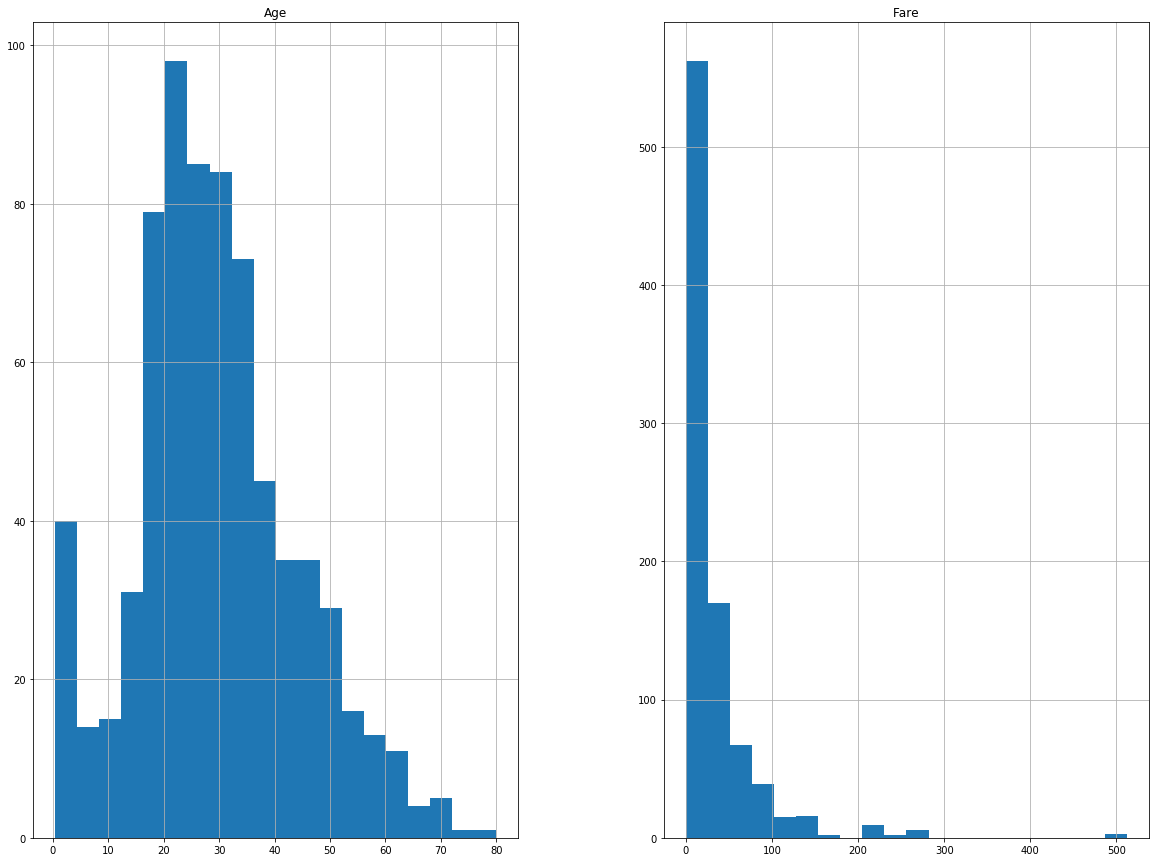

In [562]:
train[train_numeric_cols].hist(bins=20, figsize=(20,15))

# Fare is skewed
# Age is reasonably distribution. There is a spike around age 0.

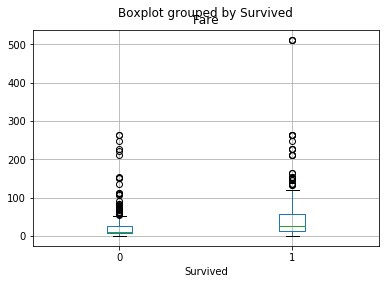

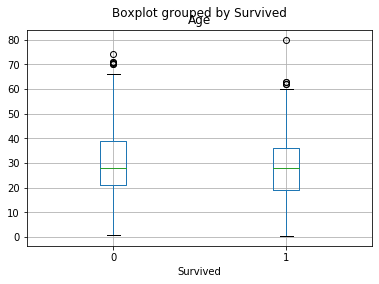

In [563]:
train.boxplot("Fare", "Survived")
train.boxplot("Age", "Survived")

# Fare is hard to visualise graphically
# Age does not appear to be a strong predictor of survival

In [564]:
train.groupby("Survived")["Fare"].describe()

# Clearly, a higher fare suggest a higher probability of survival

#print(train.groupby("Survived").agg({'Fare' : [min, max, np.mean, np.std]}))
#print("\n")
#print(train.groupby("Survived").agg({'Age' : [min, max, np.mean, np.std]}))

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [565]:
train.groupby("Survived")["Age"].describe()

# Age doesn't seem to be a strong predictor of survival

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


Look at each categorical covariate:

In [566]:
# Check overall survival rate as a reference point

train.groupby(["Survived"])["Survived"].count()/n

Survived
0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [592]:
pclass_vs_survived = train.groupby(["Pclass", "Survived"])["Survived"].count().unstack(-1)
pclass_vs_survived
pclass_vs_survived.div(pclass_vs_survived.sum(axis=1), axis=0)
# People in a higher class (1 is higher than 3) have a much higher chance
# of survival than people in a lower class

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [568]:
sex_vs_survived = train.groupby(["Sex", "Survived"])["Survived"].count().unstack(-1)
sex_vs_survived.div(sex_vs_survived.sum(axis=1), axis=0)

# Females have a much higher chance of survival

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [569]:
embarked_vs_survived = train.groupby(["Embarked", "Survived"])["Survived"].count().unstack(-1)
embarked_vs_survived.div(embarked_vs_survived.sum(axis=1), axis=0)

# Unclear

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


In [570]:
SibSp_vs_Survived = train.groupby(["SibSp", "Survived"])["Survived"].count().unstack(-1)
SibSp_vs_Survived.div(SibSp_vs_Survived.sum(axis=1), axis=0)

# More siblings = less chance of survival. Why? Don't include.

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.729730,0.270270


In [571]:
Parch_vs_Survived = train.groupby(["Parch", "Survived"])["Survived"].count().unstack(-1)
Parch_vs_Survived.div(Parch_vs_Survived.sum(axis=1), axis=0)

# No obvious relationship. Don't include.

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.536842,0.463158


In [572]:
def red_negative(x):
    colour = 'red' if x < 0 else 'green'
    return 'color: %s' % colour
        

train[["Survived", "Pclass", "Age", "Fare"]].corr().style.applymap(red_negative)
#train.corr().style.applymap(red_negative)

# Pclass and fare highly correlated. Don't include fare.

,Survived,Pclass,Age,Fare
Survived,1,-0.338481,-0.0772211,0.257307
Pclass,-0.338481,1,-0.369226,-0.5495
Age,-0.0772211,-0.369226,1,0.0960667
Fare,0.257307,-0.5495,0.0960667,1


## Data Cleaning

Age, Pclass, Sex are the predictors

In [575]:
# drop irrelevant attributes

train_revised = train.drop(["SibSp", "Parch", "Fare", "Embarked"], axis=1)

numerical_attribs = ["Age"]
categorical_attribs = ["Pclass", "Sex"]

train_revised.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


In [597]:
# From the info near the start, we know that age has missing values

import math
train[train["Age"].apply(lambda x: math.isnan(x))].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,male,NaN,0,0,8.4583,Q
17,18,1,2,male,NaN,0,0,13.0000,S
19,20,1,3,female,NaN,0,0,7.2250,C
26,27,0,3,male,NaN,0,0,7.2250,C
28,29,1,3,female,NaN,0,0,7.8792,Q


In [576]:
# replace missing 'age' values with the mean age
from sklearn.impute import SimpleImputer
# convert categorical attributes from text to numbers
from sklearn.preprocessing import OrdinalEncoder
# create dummy variables
from sklearn.preprocessing import OneHotEncoder

# create a pipeline for the categorical attributes
from sklearn.pipeline import Pipeline

categ_pipeline = Pipeline([
    ('ordinal_encoder', OrdinalEncoder()),
    ('o_h_encoder', OneHotEncoder()),
])

In [577]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("numerical", SimpleImputer(strategy="mean"), list(numerical_attribs)),
    ("categorical", categ_pipeline, list(categorical_attribs)),
])

train_final = full_pipeline.fit_transform(train_revised)
type(train_final)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


numpy.ndarray

In [581]:
X_train = pd.DataFrame(train_final)
X_train.rename(columns = {0 : "Age"}, inplace=True)
X_train.head()
y_train = train["Survived"]

X_train.shape, y_train.shape

((891, 6), (891,))

## Select and Train a Model

Logistic regression:

In [584]:
from sklearn.linear_model import LogisticRegression

reg_logistic = LogisticRegression()
reg_logistic.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [585]:
# Drop columns from the test data that we dropped from the training data
train_revised_set = set(train_revised.columns)
test_cols = set(test.columns)
cols_to_drop = list(test_cols - train_revised_set)
test_revised = test.drop(cols_to_drop, axis=1)
test_revised.head()

# Transform the test data
# NOT REALLY CORRECT AS SHOULD USE MEAN AGE FROM THE TRAINING DATA
test_final = full_pipeline.fit_transform(test_revised)

X_test = pd.DataFrame(train_final)
X_test.rename(columns = {0 : "Age"}, inplace=True)
X_test.head()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,Age,1,2,3,4,5
0,22.0,0.0,0.0,1.0,0.0,1.0
1,38.0,1.0,0.0,0.0,1.0,0.0
2,26.0,0.0,0.0,1.0,1.0,0.0
3,35.0,1.0,0.0,0.0,1.0,0.0
4,35.0,0.0,0.0,1.0,0.0,1.0


In [586]:
y_pred = reg_logistic.predict(X_test)
y_test = train["Survived"]
sum(y_pred == y_test) / n

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred) # percent of predicted survived that was correct?
recall = recall_score(y_test, y_pred) # of survived, what % did we predict right?
f1_score = f1_score(y_test, y_pred)
print(precision, recall, f1_score)

confusion_matrix(y_test, y_pred)

0.7587301587301587 0.6988304093567251 0.7275494672754947


array([[473,  76],
       [103, 239]])